In [1]:
import sys; sys.path.append('..')
import pyzx as zx
import random
%config InlineBackend.figure_format = 'svg'

In [41]:
random.seed(13)
#g = zx.generate.cliffordT(4, 50, p_t=0.2)
g = zx.generate.cliffordT(4, 200, p_t=0.4, p_hsh=0)
zx.t_count(g)

83

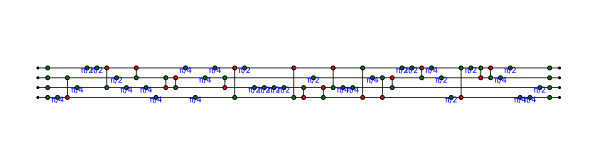

In [3]:
zx.draw(g)

In [73]:
def check(g1, gadgets):
    return sum(1 for v in gadgets for w in gadgets if g1.connected(v,w))//2

def phase_simp(g1):
    zx.spider_simp(g1, quiet=True)
    zx.to_gh(g1)
    #hile True:
    for i in range(10):
        zx.simplify.clifford_simp(g1, quiet=True)
        #zx.simplify.clifford_simp(g1, quiet=True)
        gadgets = set(zx.gadgetize(g1))
        zx.simplify.pivot_simp(g1, matchf=lambda e: not (g1.edge_s(e) in gadgets or g1.edge_t(e) in gadgets), quiet=True)
        #if check(g1, gadgets) == 0: break
        print(check(g1, gadgets), end='.')
    g1.normalise()
    return gadgets


In [76]:
for i in range(20):
    g = zx.generate.cliffordT(5, 400, p_t=0.4, p_hsh=0)
    print('trying graph...')
    gadgets = phase_simp(g)
    print('done')
    #print(check(g, gadgets))

trying graph...
0.0.0.0.0.63.0.0.0.0.done
trying graph...
0.0.0.92.0.0.0.0.0.64.done
trying graph...
0.0.202.0.0.0.0.17.12.0.done
trying graph...
0.242.0.111.84.0.0.0.0.39.done
trying graph...
0.0.152.0.94.81.0.56.47.0.done
trying graph...
0.0.0.235.0.159.133.0.0.0.done
trying graph...
0.0.0.101.118.92.0.0.0.94.done
trying graph...
0.0.0.0.0.56.0.0.0.0.done
trying graph...
0.0.0.0.85.0.83.0.0.0.done
trying graph...
385.0.0.0.0.0.0.0.38.38.done
trying graph...
0.0.0.0.0.0.0.16.11.0.done
trying graph...
0.0.101.86.65.29.0.20.44.20.done
trying graph...
0.175.0.0.56.0.24.0.24.26.done
trying graph...
0.0.0.0.0.61.0.0.47.38.done
trying graph...
0.0.0.0.39.39.39.0.0.0.done
trying graph...
299.0.0.0.0.0.0.0.0.0.done
trying graph...
0.0.0.0.0.0.0.21.23.0.done
trying graph...
0.0.0.0.0.0.0.0.0.29.done
trying graph...
0.249.0.0.0.0.0.0.0.0.done
trying graph...
0.0.152.0.0.0.0.0.0.0.done


spider_simp: 61. 41. 27. 21. 7. 5. 2.  7 iterations
19
pivot_simp: 7. 6. 3.  3 iterations
lcomp_simp: 16. 12. 2. 2.  4 iterations
id_simp: 5.  1 iterations
spider_simp: 3.  1 iterations
pivot_simp: 2.  1 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 2.  1 iterations
pivot_simp: 5. 2. 1. 2. 2. 1.  6 iterations
pivot_simp: 2. 1. 1.  3 iterations
id_simp: 6.  1 iterations
spider_simp: 1. 1. 1.  3 iterations
pivot_simp: 6. 1. 1.  3 iterations
9


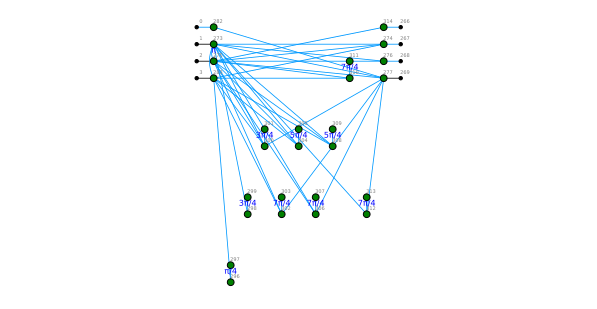

In [42]:
g1 = g.copy()
zx.spider_simp(g1)
print(zx.t_count(g1))
zx.to_gh(g1)
for i in range(2):
    zx.simplify.clifford_simp(g1)
    zx.simplify.clifford_simp(g1)
    gadgets = set(zx.gadgetize(g1))
    zx.simplify.pivot_simp(g1, matchf=lambda e: not (g1.edge_s(e) in gadgets or g1.edge_t(e) in gadgets))
g1.normalise()
print(zx.t_count(g1))
zx.draw(g1, labels=True, figsize=(8,4))

In [37]:
gadgets

{315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337}

In [43]:
all(not g1.connected(v,w) for v in gadgets for w in gadgets)

True

In [15]:
zx.quantomatic.quantomatic_location = 'C:\\quanto\\Quantomatic.jar'

In [33]:
g2 = g1.copy()
for e in g2.edges(): g2.set_edge_type(e, 1)

In [34]:
g2 = zx.quantomatic.edit_graph(g2)

Opening Quantomatic...
Done


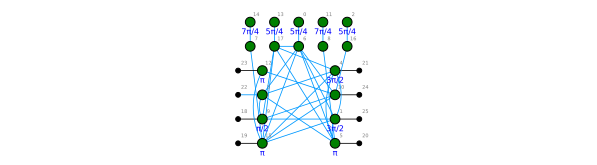

In [71]:
zx.draw(g2, labels=True)

In [73]:
zx.extract.cut_rank(g2, [12,3,9,15, 7, 8, 16, 17], [6, 4,10,1,5])

4